# Performance improvements for computationaly expensive measures

We can benchmark the performance of the local efficiency algorithm with the BCT implementation. We can see that the Comet offers a significant performance increase, especially for large networks.
This speed-up will affect all measures that depend on path-lenght calculations (global efficiency, local efficiency, shortest average path length).

The following code block will run for 10-15 minutes, so it might be preferable to enjoy the figure instead of running it again :)

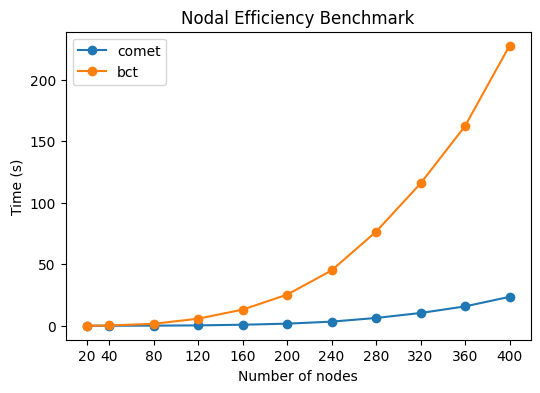

In [ ]:
import bct
import time
import numpy as np
from matplotlib import pyplot as plt
from comet import graph

# Random graph with 400 nodes and 50% density
W = np.random.rand(400,400)
W = graph.symmetrise(W)
W = graph.threshold(W, type="density", density=0.5)

# Init methods at least once to avoid first-time overhead
init_comet = graph.efficiency(W[:10,:10], local=True)
init_bct = bct.efficiency_wei(W[:10,:10])

# Run efficiency computation with increasing number of nodes
eff_comet = []
eff_bct = []
nodes = [20,40,80,120,160,200,240,280,320,360,400] # this will probably take more than 10 minutes

for i in nodes:
    start = time.time()
    eff = graph.efficiency(W[:i,:i], local=True)
    eff_comet.append(time.time() - start)

    start = time.time()
    eff = bct.efficiency_wei(W[:i,:i], local=True)
    eff_bct.append(time.time() - start)

# Plot the results
plt.figure(figsize=(6,4))
plt.title('Nodal Efficiency Benchmark')
plt.plot(nodes, eff_comet, label="comet", marker='o')
plt.plot(nodes, eff_bct, label="bct", marker='o')
plt.xlabel('Number of nodes')
plt.xticks(nodes)
plt.ylabel('Time (s)')
plt.legend();

Matching index calculations are also significantly faster:

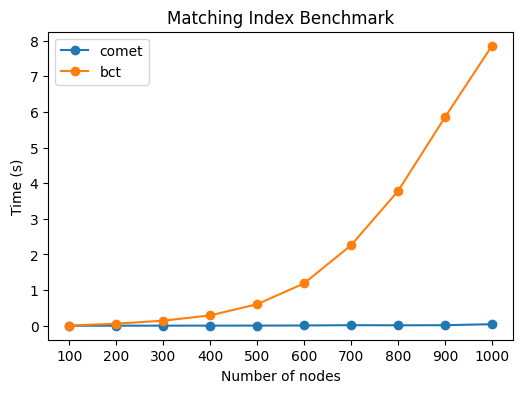

In [7]:
# Random graph with 400 nodes and 50% density
W = np.random.rand(1000,1000)
W = graph.symmetrise(W)
W = graph.threshold(W, type="density", density=0.5)

# Init methods at least once to avoid first-time overhead
init_comet = graph.matching_ind_und(W[:10,:10])
init_bct = bct.matching_ind_und(W[:10,:10])

# Run efficiency computation with increasing number of nodes
eff_comet = []
eff_bct = []
nodes = [100,200,300,400,500,600,700,800,900,1000]

for i in nodes:
    start = time.time()
    eff = graph.matching_ind_und(W[:i,:i])
    eff_comet.append(time.time() - start)

    start = time.time()
    eff = bct.matching_ind_und(W[:i,:i])
    eff_bct.append(time.time() - start)

# Plot the results
plt.figure(figsize=(6,4))
plt.title('Matching Index Benchmark')
plt.plot(nodes, eff_comet, label="comet", marker='o')
plt.plot(nodes, eff_bct, label="bct", marker='o')
plt.xlabel('Number of nodes')
plt.xticks(nodes)
plt.ylabel('Time (s)')
plt.legend();